In [2]:
from model.get_vit_model import ViT
from dataloader import fmnist, cifar10, cifar100

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from copy import deepcopy

from utils import AverageMeter

import time

import torch.nn as nn
import torch.optim as optim

import torch
import os

In [3]:
tl, _, _ = fmnist()

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
for X, y in tl:
    print(X.shape)
    break

torch.Size([100, 1, 28, 28])


In [3]:
def train_iter(net, loader, criterion, optimizer, epoch, device, print_freq=200):
    losses = AverageMeter()
    batch_time = AverageMeter()
    net.train()
    for i, (X, y) in enumerate(loader):
        X, y = X.to(device), y.to(device)
        
        pred = net(X)
        loss = criterion(pred, y)
        
        losses.update(loss.data, X.size(0))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if i % print_freq==0:
            print(' Epoch: [{0}][{1}/{2}]\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'.format(
                                epoch, i, len(loader), loss=losses))
    
    state = {
        'epoch': epoch + 1,
        'state_dict': deepcopy(net).cpu().state_dict(),
        'loss': losses.avg.detach().cpu().numpy().tolist(),
    }
    
    return state

def valid_iter(net, loader, criterion, optimizer, epoch, device, print_freq=200):
    losses = AverageMeter()
    net.eval()
    for i, (X, y) in enumerate(loader):
        X, y = X.to(device), y.to(device)
        
        pred = net(X)
        loss = criterion(pred, y)
        
        losses.update(loss.data, X.size(0))
        
        if i % print_freq==0:
            print(' Epoch: [{0}][{1}/{2}]\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'.format(
                                epoch, i, len(loader), loss=losses))
        
    
    state = {
        'loss': losses.avg.detach().cpu().numpy().tolist(),
    }
    
    return state

In [4]:
device =  'cuda:5'

criterion = nn.CrossEntropyLoss()
net = ViT(100, pretrained=True, pretrain_idx=0)
net.to('cuda:5')

optimizer = optim.Adam(net.parameters(), lr=0.0005)

trainset, testset, num_classes = cifar100(batch_size=16)

In [7]:
best_state = None
best_loss = 9999999
for epoch in range(100):
    train_state = train_iter(net, trainset, criterion, optimizer, epoch, device)
    valid_state = valid_iter(net, testset, criterion, optimizer, epoch, device)
    
    if best_loss > valid_state['loss']:
        best_loss = valid_state['loss']
        best_state = train_state

 Epoch: [0][0/3125]	Loss 4.6750 (4.6750)	
 Epoch: [0][200/3125]	Loss 4.5429 (4.5542)	
 Epoch: [0][400/3125]	Loss 4.0856 (4.4476)	
 Epoch: [0][600/3125]	Loss 3.7479 (4.3678)	
 Epoch: [0][800/3125]	Loss 4.1001 (4.3083)	
 Epoch: [0][1000/3125]	Loss 4.5767 (4.2626)	
 Epoch: [0][1200/3125]	Loss 3.7743 (4.2177)	
 Epoch: [0][1400/3125]	Loss 3.2822 (4.1747)	
 Epoch: [0][1600/3125]	Loss 4.2129 (4.1407)	
 Epoch: [0][1800/3125]	Loss 3.4192 (4.1077)	
 Epoch: [0][2000/3125]	Loss 3.8672 (4.0778)	
 Epoch: [0][2200/3125]	Loss 3.9128 (4.0507)	
 Epoch: [0][2400/3125]	Loss 3.1676 (4.0259)	
 Epoch: [0][2600/3125]	Loss 3.9907 (4.0015)	
 Epoch: [0][2800/3125]	Loss 3.3026 (3.9800)	
 Epoch: [0][3000/3125]	Loss 4.1910 (3.9589)	
 Epoch: [0][0/625]	Loss 3.7216 (3.7216)	
 Epoch: [0][200/625]	Loss 3.3245 (3.5924)	
 Epoch: [0][400/625]	Loss 3.1645 (3.5815)	
 Epoch: [0][600/625]	Loss 3.3039 (3.5904)	
 Epoch: [1][0/3125]	Loss 3.1994 (3.1994)	
 Epoch: [1][200/3125]	Loss 3.7775 (3.6320)	
 Epoch: [1][400/3125]	Loss 4.01

 Epoch: [9][1200/3125]	Loss 1.4398 (2.4842)	
 Epoch: [9][1400/3125]	Loss 2.1522 (2.4882)	
 Epoch: [9][1600/3125]	Loss 3.1320 (2.4929)	
 Epoch: [9][1800/3125]	Loss 2.3511 (2.4985)	
 Epoch: [9][2000/3125]	Loss 1.9355 (2.4974)	
 Epoch: [9][2200/3125]	Loss 1.7748 (2.4977)	
 Epoch: [9][2400/3125]	Loss 1.5438 (2.4947)	
 Epoch: [9][2600/3125]	Loss 2.8384 (2.4930)	
 Epoch: [9][2800/3125]	Loss 2.1487 (2.4933)	
 Epoch: [9][3000/3125]	Loss 3.2790 (2.4960)	
 Epoch: [9][0/625]	Loss 2.2521 (2.2521)	
 Epoch: [9][200/625]	Loss 3.0785 (2.3975)	
 Epoch: [9][400/625]	Loss 2.6114 (2.3867)	
 Epoch: [9][600/625]	Loss 2.1411 (2.4010)	
 Epoch: [10][0/3125]	Loss 1.6120 (1.6120)	
 Epoch: [10][200/3125]	Loss 2.0936 (2.3960)	
 Epoch: [10][400/3125]	Loss 1.9085 (2.4082)	
 Epoch: [10][600/3125]	Loss 3.3419 (2.4008)	
 Epoch: [10][800/3125]	Loss 2.4614 (2.4003)	
 Epoch: [10][1000/3125]	Loss 3.4180 (2.4039)	
 Epoch: [10][1200/3125]	Loss 2.9325 (2.4029)	
 Epoch: [10][1400/3125]	Loss 2.4796 (2.4088)	
 Epoch: [10][1600/3

 Epoch: [18][1600/3125]	Loss 2.9669 (1.9571)	
 Epoch: [18][1800/3125]	Loss 1.7739 (1.9636)	
 Epoch: [18][2000/3125]	Loss 1.4292 (1.9682)	
 Epoch: [18][2200/3125]	Loss 1.8208 (1.9708)	
 Epoch: [18][2400/3125]	Loss 2.5046 (1.9693)	
 Epoch: [18][2600/3125]	Loss 1.5665 (1.9718)	
 Epoch: [18][2800/3125]	Loss 2.1093 (1.9762)	
 Epoch: [18][3000/3125]	Loss 1.5517 (1.9803)	
 Epoch: [18][0/625]	Loss 2.0102 (2.0102)	
 Epoch: [18][200/625]	Loss 2.1143 (2.1590)	
 Epoch: [18][400/625]	Loss 2.5194 (2.1139)	
 Epoch: [18][600/625]	Loss 1.8111 (2.1275)	
 Epoch: [19][0/3125]	Loss 2.2120 (2.2120)	
 Epoch: [19][200/3125]	Loss 1.7767 (1.8176)	
 Epoch: [19][400/3125]	Loss 1.8285 (1.8483)	
 Epoch: [19][600/3125]	Loss 2.7506 (1.8742)	
 Epoch: [19][800/3125]	Loss 1.9851 (1.8859)	
 Epoch: [19][1000/3125]	Loss 2.1588 (1.8992)	
 Epoch: [19][1200/3125]	Loss 1.8116 (1.8959)	
 Epoch: [19][1400/3125]	Loss 1.7086 (1.8969)	
 Epoch: [19][1600/3125]	Loss 2.0284 (1.9006)	
 Epoch: [19][1800/3125]	Loss 2.0699 (1.9025)	
 Epoc

 Epoch: [27][2000/3125]	Loss 1.8064 (1.5465)	
 Epoch: [27][2200/3125]	Loss 1.0335 (1.5519)	
 Epoch: [27][2400/3125]	Loss 1.5953 (1.5539)	
 Epoch: [27][2600/3125]	Loss 1.8417 (1.5574)	
 Epoch: [27][2800/3125]	Loss 1.6174 (1.5578)	
 Epoch: [27][3000/3125]	Loss 1.1095 (1.5586)	
 Epoch: [27][0/625]	Loss 1.4870 (1.4870)	
 Epoch: [27][200/625]	Loss 2.4754 (2.0777)	
 Epoch: [27][400/625]	Loss 1.2817 (2.0759)	
 Epoch: [27][600/625]	Loss 2.1387 (2.0888)	
 Epoch: [28][0/3125]	Loss 1.3896 (1.3896)	
 Epoch: [28][200/3125]	Loss 1.4259 (1.4958)	
 Epoch: [28][400/3125]	Loss 1.5741 (1.4565)	
 Epoch: [28][600/3125]	Loss 1.5703 (1.4601)	
 Epoch: [28][800/3125]	Loss 1.4957 (1.4759)	
 Epoch: [28][1000/3125]	Loss 1.4682 (1.4784)	
 Epoch: [28][1200/3125]	Loss 1.3683 (1.4856)	
 Epoch: [28][1400/3125]	Loss 0.9116 (1.4845)	
 Epoch: [28][1600/3125]	Loss 1.1872 (1.4894)	
 Epoch: [28][1800/3125]	Loss 1.7122 (1.4941)	
 Epoch: [28][2000/3125]	Loss 1.9795 (1.4981)	
 Epoch: [28][2200/3125]	Loss 1.3120 (1.5023)	
 Epoc

 Epoch: [36][2400/3125]	Loss 1.3777 (1.2392)	
 Epoch: [36][2600/3125]	Loss 0.7775 (1.2416)	
 Epoch: [36][2800/3125]	Loss 1.4779 (1.2416)	
 Epoch: [36][3000/3125]	Loss 0.9496 (1.2439)	
 Epoch: [36][0/625]	Loss 1.3307 (1.3307)	
 Epoch: [36][200/625]	Loss 2.5676 (2.4563)	
 Epoch: [36][400/625]	Loss 1.8682 (2.4323)	
 Epoch: [36][600/625]	Loss 1.9948 (2.4357)	
 Epoch: [37][0/3125]	Loss 1.5676 (1.5676)	
 Epoch: [37][200/3125]	Loss 1.1889 (1.0988)	
 Epoch: [37][400/3125]	Loss 0.7408 (1.1310)	
 Epoch: [37][600/3125]	Loss 0.8389 (1.1324)	
 Epoch: [37][800/3125]	Loss 2.4333 (1.1415)	
 Epoch: [37][1000/3125]	Loss 0.7318 (1.1518)	
 Epoch: [37][1200/3125]	Loss 1.6059 (1.1627)	
 Epoch: [37][1400/3125]	Loss 1.3108 (1.1675)	
 Epoch: [37][1600/3125]	Loss 0.9607 (1.1681)	
 Epoch: [37][1800/3125]	Loss 0.8812 (1.1775)	
 Epoch: [37][2000/3125]	Loss 1.1900 (1.1876)	
 Epoch: [37][2200/3125]	Loss 1.8014 (1.1919)	
 Epoch: [37][2400/3125]	Loss 0.8570 (1.1975)	
 Epoch: [37][2600/3125]	Loss 0.5206 (1.1991)	
 Epoc

 Epoch: [45][2800/3125]	Loss 1.5872 (1.0174)	
 Epoch: [45][3000/3125]	Loss 2.2184 (1.0211)	
 Epoch: [45][0/625]	Loss 1.6918 (1.6918)	
 Epoch: [45][200/625]	Loss 2.7327 (2.5190)	
 Epoch: [45][400/625]	Loss 2.9330 (2.4837)	
 Epoch: [45][600/625]	Loss 3.4982 (2.4793)	
 Epoch: [46][0/3125]	Loss 1.0779 (1.0779)	
 Epoch: [46][200/3125]	Loss 0.5245 (0.9589)	
 Epoch: [46][400/3125]	Loss 1.0381 (0.9545)	
 Epoch: [46][600/3125]	Loss 1.5495 (0.9518)	
 Epoch: [46][800/3125]	Loss 0.8082 (0.9558)	
 Epoch: [46][1000/3125]	Loss 0.9578 (0.9618)	
 Epoch: [46][1200/3125]	Loss 1.0177 (0.9657)	
 Epoch: [46][1400/3125]	Loss 1.0040 (0.9714)	
 Epoch: [46][1600/3125]	Loss 1.1456 (0.9718)	
 Epoch: [46][1800/3125]	Loss 0.9277 (0.9780)	
 Epoch: [46][2000/3125]	Loss 1.7056 (0.9815)	
 Epoch: [46][2200/3125]	Loss 0.9456 (0.9854)	
 Epoch: [46][2400/3125]	Loss 1.2467 (0.9893)	
 Epoch: [46][2600/3125]	Loss 0.7436 (0.9914)	
 Epoch: [46][2800/3125]	Loss 0.5479 (0.9953)	
 Epoch: [46][3000/3125]	Loss 1.6562 (0.9987)	
 Epoc

 Epoch: [54][0/625]	Loss 2.9434 (2.9434)	
 Epoch: [54][200/625]	Loss 3.1376 (2.7786)	
 Epoch: [54][400/625]	Loss 2.4585 (2.8168)	
 Epoch: [54][600/625]	Loss 3.0371 (2.7740)	
 Epoch: [55][0/3125]	Loss 0.4462 (0.4462)	
 Epoch: [55][200/3125]	Loss 0.7315 (0.8460)	
 Epoch: [55][400/3125]	Loss 0.5662 (0.8371)	
 Epoch: [55][600/3125]	Loss 1.4910 (0.8319)	
 Epoch: [55][800/3125]	Loss 1.3678 (0.8361)	
 Epoch: [55][1000/3125]	Loss 0.9147 (0.8321)	
 Epoch: [55][1200/3125]	Loss 0.5474 (0.8414)	
 Epoch: [55][1400/3125]	Loss 0.8129 (0.8461)	
 Epoch: [55][1600/3125]	Loss 0.5029 (0.8505)	
 Epoch: [55][1800/3125]	Loss 1.2850 (0.8526)	
 Epoch: [55][2000/3125]	Loss 0.7079 (0.8530)	
 Epoch: [55][2200/3125]	Loss 0.5655 (0.8571)	
 Epoch: [55][2400/3125]	Loss 0.9611 (0.8623)	
 Epoch: [55][2600/3125]	Loss 0.9804 (0.8672)	
 Epoch: [55][2800/3125]	Loss 1.3480 (0.8668)	
 Epoch: [55][3000/3125]	Loss 0.6323 (0.8696)	
 Epoch: [55][0/625]	Loss 3.3434 (3.3434)	
 Epoch: [55][200/625]	Loss 3.6586 (2.9418)	
 Epoch: [55

 Epoch: [63][400/625]	Loss 2.8935 (2.8928)	
 Epoch: [63][600/625]	Loss 0.5556 (2.9073)	
 Epoch: [64][0/3125]	Loss 0.3645 (0.3645)	
 Epoch: [64][200/3125]	Loss 1.5463 (0.7444)	
 Epoch: [64][400/3125]	Loss 0.5755 (0.7487)	
 Epoch: [64][600/3125]	Loss 1.3449 (0.7429)	
 Epoch: [64][800/3125]	Loss 1.2797 (0.7433)	
 Epoch: [64][1000/3125]	Loss 0.7266 (0.7475)	
 Epoch: [64][1200/3125]	Loss 0.5085 (0.7425)	
 Epoch: [64][1400/3125]	Loss 0.4652 (0.7427)	
 Epoch: [64][1600/3125]	Loss 0.1886 (0.7499)	
 Epoch: [64][1800/3125]	Loss 1.1689 (0.7529)	
 Epoch: [64][2000/3125]	Loss 1.4072 (0.7545)	
 Epoch: [64][2200/3125]	Loss 0.5169 (0.7557)	
 Epoch: [64][2400/3125]	Loss 0.6372 (0.7581)	
 Epoch: [64][2600/3125]	Loss 0.7888 (0.7618)	
 Epoch: [64][2800/3125]	Loss 0.9331 (0.7678)	
 Epoch: [64][3000/3125]	Loss 0.8126 (0.7722)	
 Epoch: [64][0/625]	Loss 5.6139 (5.6139)	
 Epoch: [64][200/625]	Loss 3.4821 (2.9612)	
 Epoch: [64][400/625]	Loss 5.0132 (2.9045)	
 Epoch: [64][600/625]	Loss 3.1148 (2.9276)	
 Epoch: [

 Epoch: [73][0/3125]	Loss 1.5015 (1.5015)	
 Epoch: [73][200/3125]	Loss 0.9153 (0.6385)	
 Epoch: [73][400/3125]	Loss 1.3369 (0.6385)	
 Epoch: [73][600/3125]	Loss 0.6293 (0.6553)	
 Epoch: [73][800/3125]	Loss 0.7053 (0.6626)	
 Epoch: [73][1000/3125]	Loss 0.9647 (0.6720)	
 Epoch: [73][1200/3125]	Loss 0.5540 (0.6807)	
 Epoch: [73][1400/3125]	Loss 0.5097 (0.6813)	
 Epoch: [73][1600/3125]	Loss 1.1108 (0.6867)	
 Epoch: [73][1800/3125]	Loss 0.6423 (0.6882)	
 Epoch: [73][2000/3125]	Loss 0.4565 (0.6950)	
 Epoch: [73][2200/3125]	Loss 0.9558 (0.6974)	
 Epoch: [73][2400/3125]	Loss 0.5471 (0.6967)	
 Epoch: [73][2600/3125]	Loss 0.6253 (0.7008)	
 Epoch: [73][2800/3125]	Loss 1.0776 (0.7026)	
 Epoch: [73][3000/3125]	Loss 0.1126 (0.7030)	
 Epoch: [73][0/625]	Loss 1.6865 (1.6865)	
 Epoch: [73][200/625]	Loss 0.8413 (2.9513)	
 Epoch: [73][400/625]	Loss 3.0231 (2.9539)	
 Epoch: [73][600/625]	Loss 2.9028 (2.9537)	
 Epoch: [74][0/3125]	Loss 0.2169 (0.2169)	
 Epoch: [74][200/3125]	Loss 0.9449 (0.6811)	
 Epoch: [

 Epoch: [82][400/3125]	Loss 0.2035 (0.6247)	
 Epoch: [82][600/3125]	Loss 1.0105 (0.6399)	
 Epoch: [82][800/3125]	Loss 0.7356 (0.6316)	
 Epoch: [82][1000/3125]	Loss 0.7246 (0.6477)	
 Epoch: [82][1200/3125]	Loss 0.8910 (0.6554)	
 Epoch: [82][1400/3125]	Loss 0.8118 (0.6529)	
 Epoch: [82][1600/3125]	Loss 0.2596 (0.6528)	
 Epoch: [82][1800/3125]	Loss 0.4466 (0.6551)	
 Epoch: [82][2000/3125]	Loss 0.7754 (0.6566)	
 Epoch: [82][2200/3125]	Loss 0.6684 (0.6557)	
 Epoch: [82][2400/3125]	Loss 0.7539 (0.6563)	
 Epoch: [82][2600/3125]	Loss 0.5348 (0.6577)	
 Epoch: [82][2800/3125]	Loss 0.1124 (0.6565)	
 Epoch: [82][3000/3125]	Loss 1.0377 (0.6586)	
 Epoch: [82][0/625]	Loss 2.7846 (2.7846)	
 Epoch: [82][200/625]	Loss 1.8078 (3.0144)	
 Epoch: [82][400/625]	Loss 4.8446 (3.1007)	
 Epoch: [82][600/625]	Loss 4.6508 (3.0866)	
 Epoch: [83][0/3125]	Loss 0.6347 (0.6347)	
 Epoch: [83][200/3125]	Loss 1.2026 (0.6192)	
 Epoch: [83][400/3125]	Loss 0.7389 (0.6187)	
 Epoch: [83][600/3125]	Loss 0.5982 (0.6232)	
 Epoch:

 Epoch: [91][800/3125]	Loss 1.0241 (0.6048)	
 Epoch: [91][1000/3125]	Loss 0.3012 (0.5991)	
 Epoch: [91][1200/3125]	Loss 0.1988 (0.6027)	
 Epoch: [91][1400/3125]	Loss 0.9577 (0.5966)	
 Epoch: [91][1600/3125]	Loss 0.6503 (0.6007)	
 Epoch: [91][1800/3125]	Loss 0.9744 (0.6006)	
 Epoch: [91][2000/3125]	Loss 1.2706 (0.6009)	
 Epoch: [91][2200/3125]	Loss 0.4975 (0.6035)	
 Epoch: [91][2400/3125]	Loss 0.1363 (0.6044)	
 Epoch: [91][2600/3125]	Loss 0.3448 (0.6031)	
 Epoch: [91][2800/3125]	Loss 0.8518 (0.6027)	
 Epoch: [91][3000/3125]	Loss 0.7835 (0.6007)	
 Epoch: [91][0/625]	Loss 3.0744 (3.0744)	
 Epoch: [91][200/625]	Loss 2.9269 (3.0346)	
 Epoch: [91][400/625]	Loss 3.6588 (3.0520)	
 Epoch: [91][600/625]	Loss 2.3862 (3.0458)	
 Epoch: [92][0/3125]	Loss 0.6020 (0.6020)	
 Epoch: [92][200/3125]	Loss 0.8217 (0.5728)	
 Epoch: [92][400/3125]	Loss 0.6802 (0.5740)	
 Epoch: [92][600/3125]	Loss 0.7925 (0.5718)	
 Epoch: [92][800/3125]	Loss 0.5176 (0.5633)	
 Epoch: [92][1000/3125]	Loss 0.5547 (0.5715)	
 Epoch

In [13]:
if not os.path.exists('/workspace/paper_works/work_results/cifar100_vit/'):
    os.mkdir('/workspace/paper_works/work_results/cifar100_vit/')

torch.save(best_state, '/workspace/paper_works/work_results/cifar100_vit/best_state.ptl')

In [14]:
net.config

ViTConfig {
  "_name_or_path": "google/vit-base-patch16-224-in21k",
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "transformers_version": "4.10.0"
}

In [15]:
config = {
    "attention_probs_dropout_prob": 0.0,
    "hidden_act": "gelu",
    "hidden_dropout_prob": 0.0,
    "hidden_size": 768,
    "image_size": 32,
    "initializer_range": 0.02,
    "intermediate_size": 3072,
    "layer_norm_eps": 1e-12,
    "model_type": "vit",
    "num_attention_heads": 12,
    "num_channels": 1,
    "num_hidden_layers": 8,
    "patch_size": 16,
}

In [17]:
device =  'cuda:5'

criterion = nn.CrossEntropyLoss()
net = ViT(10, pretrained=False, pretrain_idx=0, configuration=config)
net.to('cuda:5')

optimizer = optim.Adam(net.parameters(), lr=0.0005)

trainset, testset, num_classes = fashion_mnist(batch_size=64)

TypeError: zeros(): argument 'size' must be tuple of ints, but found element of type dict at pos 3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

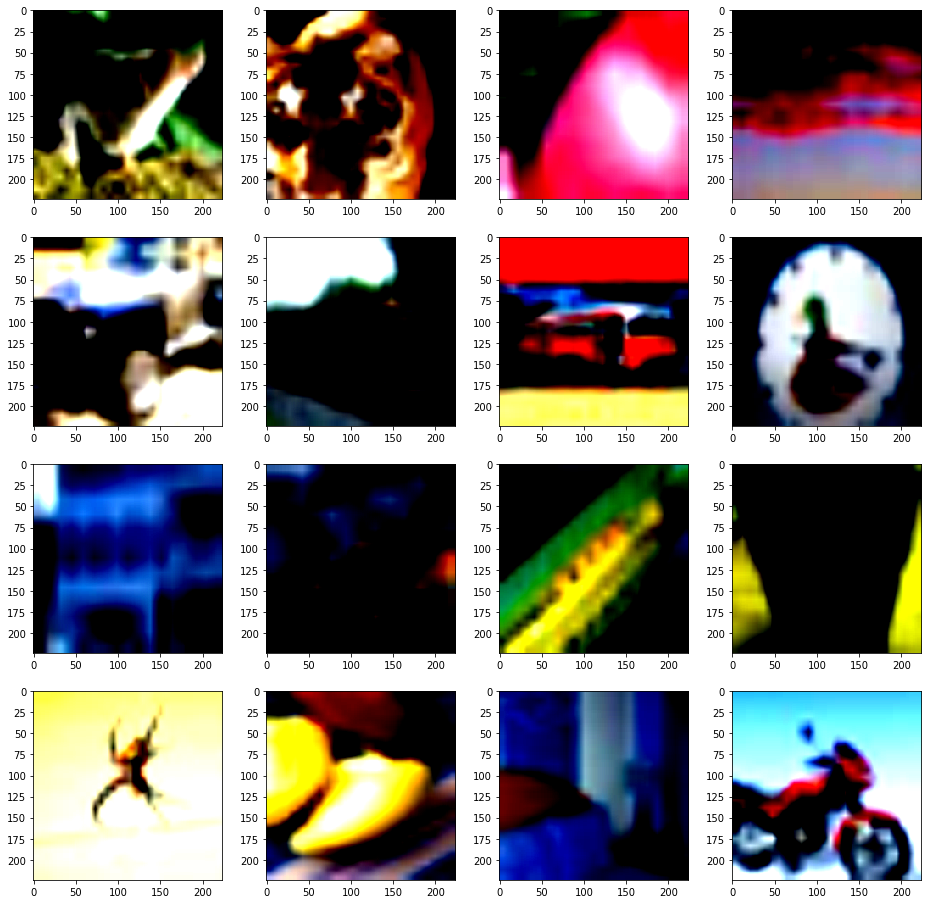

In [17]:
fig, ax = plt.subplots(4,4, figsize=(16,16))
for i in range(16):
    ax[i//4][i%4].imshow(X[i].numpy().transpose((1,2,0)), interpolation='nearest')
plt.show()